In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

LOADS

In [2]:
# %load visualize_hierarchical_clusters.py
# Omid55
def visualize_hierarchical_clusters(data, NUMBER_OF_CLUSTERS, metric='cosine'):
    from sklearn.cluster import AgglomerativeClustering
    from sklearn import manifold
    from time import time


    X = np.asmatrix(data.ix[:,:-1])
    y = np.asanyarray(data['label'])
    
    #----------------------------------------------------------------------
    # Visualize the clustering
    def plot_clustering(X_red, X, labels, title=None):
        x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
        X_red = (X_red - x_min) / (x_max - x_min)

        plt.figure(figsize=(6, 4))
        for i in range(X_red.shape[0]):
            plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                     color=plt.cm.spectral(labels[i] / 10.),
                     fontdict={'weight': 'bold', 'size': 9})

        plt.xticks([])
        plt.yticks([])
        if title is not None:
            plt.title(title, size=17)
        plt.axis('off')
        plt.tight_layout()

    #----------------------------------------------------------------------
    # 2D embedding of the digits dataset
    print("Computing embedding")
    X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
    print("Done.")

    if metric == 'euclidean':
        linkages = ['ward', 'average', 'complete']
    else:
        linkages = ['average', 'complete']

    for linkage in linkages:
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=NUMBER_OF_CLUSTERS)
        t0 = time()
        clustering.fit(X_red)
        print("%s : %.2fs" % (linkage, time() - t0))
        plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)

    plt.show()

In [3]:
# %load normalize_the_dataset.py
# Omid55
def normalize_the_dataset(dataset):
	from sklearn.preprocessing import StandardScaler

	# MIN MAX Normalization
	#x = dataset.values #returns a numpy array
	#min_max_scaler = preprocessing.MinMaxScaler()
	#x_scaled = min_max_scaler.fit_transform(x)
	#dataset = pd.DataFrame(x_scaled)

	# Standard Normalization (x-mean(x) / std(x))
	x = dataset.values[:,:-1] #returns a numpy array
	min_max_scaler = StandardScaler()
	x_scaled = min_max_scaler.fit_transform(x)
	dataset = pd.DataFrame(np.column_stack((x_scaled,dataset.values[:,-1])), columns=dataset.columns)

	return dataset

In [4]:
# %load plot_data.py
# Omid55
def plot_data(data, has_label=True):
	import numpy as np
	from sklearn.manifold import TSNE
	from sklearn.decomposition import PCA

	if not has_label:
		data = data.copy()
		data['label'] = np.zeros([len(data),1])

	LIMIT = 4000
	if data.shape[0] > LIMIT:
		dt = data.sample(n=LIMIT, replace=False)
		X = dt.ix[:,:-1]
		labels = dt.ix[:,-1]
	else:
		X = data.ix[:,:-1]
		labels = data.ix[:,-1]

	tsne_model = TSNE(n_components=2, random_state=0)
	np.set_printoptions(suppress=True)
	points1 = tsne_model.fit_transform(X)
	df1 = pd.DataFrame(data=np.column_stack([points1,labels]), columns=["x","y","class"])
	sns.lmplot("x", "y", data=df1, hue='class', fit_reg=False, palette=sns.color_palette('colorblind'))
	sns.plt.title('TNSE')

	pca = PCA(n_components=2)
	pca.fit(X)
	points2 = pca.transform(X)
	df2 = pd.DataFrame(data=np.column_stack([points2,labels]), columns=["x","y","class"])
	sns.lmplot("x", "y", data=df2, hue='class', fit_reg=False, palette=sns.color_palette('colorblind'))
	sns.plt.title('PCA')


In [5]:
# %load dropnans_from_dataset.py
# Omid55
def dropnans_from_dataset(dataset):
	to_be_deleted = []
	for idx,item in enumerate(dataset.as_matrix()):
	    if np.isnan(item).any():
	        to_be_deleted.append(idx)
	dataset = dataset.drop(to_be_deleted)
	return dataset

In [6]:
# %load do_classification.py
#Omid55
def do_classification(dataset):
    
    # import print_class_ratio.py
    import sklearn as sk
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import cross_validation
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn import svm
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    from sklearn.linear_model import SGDClassifier
    from sklearn.dummy import DummyClassifier

    if type(dataset) is pd.core.frame.DataFrame:
        dataset = dataset.as_matrix()

    #clf = MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    models = [#(DummyClassifier(strategy='stratified'), 'Dummy (Stratified)'),
        (DummyClassifier(strategy='uniform'), 'Dummy (Uniform)'),
        (SGDClassifier(), 'Stochastic Gradient Descent Classifier'),
        (LogisticRegression(), 'Logistic Regression'),
        (GaussianNB(), 'Naive Bayes'),
        (svm.LinearSVC(C=1.0, verbose=False), 'Linear SVM'),
        (svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False), 'SVM with RBF kernel'),
        (RandomForestClassifier(n_estimators=100), 'Random Forest'),
        (KNeighborsClassifier(n_neighbors=8), 'KNN'),
        (DecisionTreeClassifier(max_depth=5), 'Decision Tree'),
        (AdaBoostClassifier(), 'AdaBoost'),
        (LinearDiscriminantAnalysis(), 'Linear Discriminant Analysis'),
        (QuadraticDiscriminantAnalysis(), 'Quadratic Discriminant Analysis')]
    
    #print(print_class_ratio(dataset))
    #print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    # applying the models
    n_folds = 10
    k_fold = cross_validation.KFold(n=len(dataset), n_folds=n_folds, shuffle=False, random_state=None)
    accuracy = {}
    train_accuracy = {}
    for train_index, test_index in k_fold:
        X_train = dataset[train_index,:-1]
        y_train = dataset[train_index,-1]
        X_test = dataset[test_index,:-1]
        y_test = dataset[test_index,-1]

        for clf, name in models:
            clf.fit(X_train, y_train)

            # test data accuracy
            y_pred = clf.predict(X_test)
            accuracy_percent = 100 * sk.metrics.accuracy_score(y_test, y_pred) / n_folds
            if name not in accuracy:
                accuracy[name] = accuracy_percent
            else:
                accuracy[name] += accuracy_percent

            # train data accuracy
            y_train_pred = clf.predict(X_train)
            train_accuracy_percent = 100 * sk.metrics.accuracy_score(y_train, y_train_pred) / n_folds
            if name not in train_accuracy:
                train_accuracy[name] = train_accuracy_percent
            else:
                train_accuracy[name] += train_accuracy_percent
        result = []
        for key in accuracy.keys():
            result.append([key, round(accuracy[key],2), round(train_accuracy[key],2)])
        result_accuracy_df = pd.DataFrame(data=result, columns=['classifier', 'test acc', 'train acc'])
    return result_accuracy_df


# Run

In [20]:
# original_data = pd.read_csv('StatDataset.csv')
# original_data = original_data.drop(original_data.columns[0], 1)
# original_data = dropnans_from_dataset(original_data)
# sampled_data = original_data.sample(n=1000)

original_data = pd.read_csv('ReallyGoodCorrStat2015_for_Classification2016_Dataset.csv')
print(original_data.shape)
original_data = original_data.drop(original_data.columns[0], 1)
#sampled_data = dropnans_from_dataset(original_data)
original_data = dropnans_from_dataset(original_data)
sampled_data = original_data.sample(n=650)


(709, 17)


In [21]:
sampled_data.head()

,winner_avg_game_count,winner_std_game_count,winner_avg_win_ratio,winner_std_win_ratio,winner_avg_same_champion_game_count,winner_std_same_champion_game_count,winner_avg_same_champion_win_ratio,winner_std_same_champion_win_ratio,loser_avg_game_count,loser_std_game_count,loser_avg_win_ratio,loser_std_win_ratio,loser_avg_same_champion_game_count,loser_std_same_champion_game_count,loser_avg_same_champion_win_ratio,loser_std_same_champion_win_ratio
344,867.6,569.989684,0.491751,0.011506,231.00,142.467540,0.495911,0.076832,623.40,473.531667,0.505951,0.029013,9.00,5.873670,0.296074,0.192399
176,435.0,176.275920,0.519140,0.011893,6.00,0.816497,0.623810,0.127953,959.60,796.313657,0.487442,0.021654,8.25,6.139015,0.404762,0.270424
269,320.6,208.963729,0.537451,0.043255,5.75,4.968652,0.591667,0.289036,599.40,326.330262,0.507906,0.010069,5.00,4.000000,0.166667,0.166667
13,273.4,337.127632,0.477895,0.019637,19.20,21.245235,0.289543,0.245281,260.75,402.851942,0.378878,0.219386,374.00,0.000000,0.473262,0.000000
543,582.0,278.052513,0.510096,0.016416,30.40,26.948840,0.595788,0.126813,845.20,526.441032,0.513319,0.022909,58.75,47.913333,0.555891,0.136543


Analysis of importance for each feature

(array([   1.,    1.,   11.,   39.,  127.,  265.,  128.,   61.,   14.,    3.]),
 array([-1393.5 , -1142.75,  -892.  ,  -641.25,  -390.5 ,  -139.75,
          111.  ,   361.75,   612.5 ,   863.25,  1114.  ]),
 <a list of 10 Patch objects>)

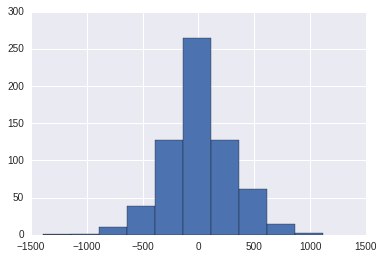

In [22]:
plt.hist(sampled_data['winner_avg_game_count'] - sampled_data['loser_avg_game_count'] )

(array([   8.,    7.,   46.,   95.,  256.,  167.,   49.,   16.,    5.,    1.]),
 array([-0.20644721, -0.16227202, -0.11809683, -0.07392164, -0.02974645,
         0.01442874,  0.05860393,  0.10277912,  0.14695431,  0.1911295 ,
         0.23530469]),
 <a list of 10 Patch objects>)

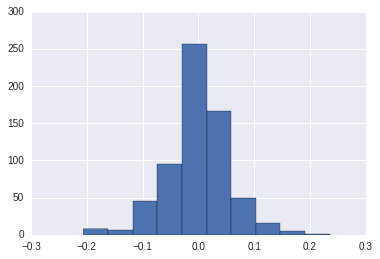

In [23]:
plt.hist(sampled_data['winner_avg_win_ratio'] - sampled_data['loser_avg_win_ratio'] )

(array([   2.,   11.,   82.,  486.,   58.,    7.,    1.,    0.,    2.,    1.]),
 array([-354.8 , -248.67, -142.54,  -36.41,   69.72,  175.85,  281.98,
         388.11,  494.24,  600.37,  706.5 ]),
 <a list of 10 Patch objects>)

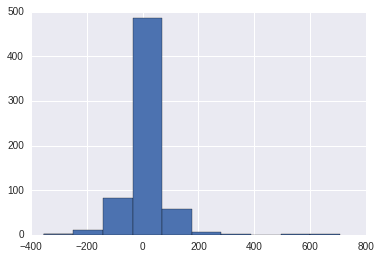

In [24]:
plt.hist(sampled_data['winner_avg_same_champion_game_count'] - sampled_data['loser_avg_same_champion_game_count'] )

(array([   1.,    2.,   10.,   35.,  135.,  226.,  174.,   55.,    9.,    3.]),
 array([-1.        , -0.82061224, -0.64122449, -0.46183673, -0.28244898,
        -0.10306122,  0.07632653,  0.25571429,  0.43510204,  0.6144898 ,
         0.79387755]),
 <a list of 10 Patch objects>)

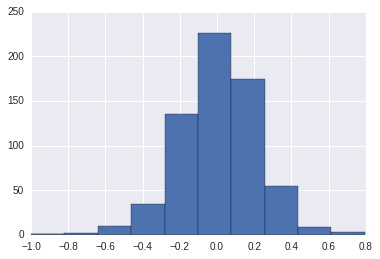

In [25]:
plt.hist(sampled_data['winner_avg_same_champion_win_ratio'] - sampled_data['loser_avg_same_champion_win_ratio'] )

Adding label and swapping 50% of winners and losers ;Thus:
    
label 0 == winner + loser

label 1 == loser + winner

In [26]:
dataset = sampled_data.copy()
dataset['label'] = np.zeros([len(dataset),1])
dt = dataset.as_matrix()
idx = np.random.choice(len(dt), int(len(dt)/2), replace=False)
tf = math.floor(dt.shape[1]/2)
tmp = dt[idx,tf:2*tf]
dt[idx,tf:2*tf] = dt[idx,:tf]
dt[idx,:tf] = tmp
dt[idx,-1] = 1
dataset = pd.DataFrame(data=dt, columns=dataset.columns)

dataset = normalize_the_dataset(dataset)

In [27]:
dataset.head()

,winner_avg_game_count,winner_std_game_count,winner_avg_win_ratio,winner_std_win_ratio,winner_avg_same_champion_game_count,winner_std_same_champion_game_count,winner_avg_same_champion_win_ratio,winner_std_same_champion_win_ratio,loser_avg_game_count,loser_std_game_count,loser_avg_win_ratio,loser_std_win_ratio,loser_avg_same_champion_game_count,loser_std_same_champion_game_count,loser_avg_same_champion_win_ratio,loser_std_same_champion_win_ratio,label
0,0.976735,0.822347,0.496310,-0.558343,-0.492704,-0.482548,-1.095500,0.225047,2.001945,1.312120,0.203653,-0.923697,4.073355,1.836629,0.115972,-0.798653,1.0
1,2.392308,2.343267,0.141938,-0.710116,-0.504600,-0.478668,-0.396491,0.970564,0.181770,-0.592553,0.742733,-0.915185,-0.715867,-0.669810,0.992178,-0.310046,1.0
2,0.875683,0.128747,0.533736,-0.949050,-0.556150,-0.509949,-1.927758,-0.020822,-0.299571,-0.434418,1.103138,-0.225533,-0.721188,-0.596340,0.771973,1.229563,1.0
3,-0.550205,0.489310,-1.936584,3.368047,5.296685,-0.568447,0.044056,-1.613295,-0.498166,0.185601,-0.069069,-0.744880,-0.434899,-0.308334,-1.297820,0.811366,1.0
4,0.802420,-0.098733,0.575663,-0.818149,-0.153272,-0.174337,0.832062,-0.401620,1.907696,1.101444,0.628162,-0.672930,0.406940,0.163543,0.526883,-0.227944,0.0


In [28]:
dataset.shape

(650, 17)

# Plotting

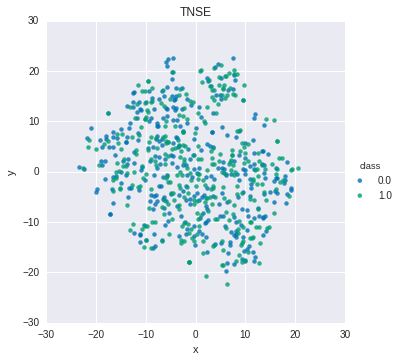

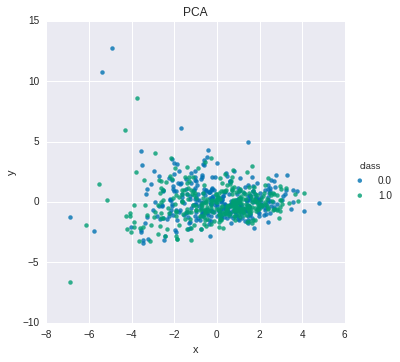

In [29]:
plot_data(dataset)

Computing embedding
Done.
average : 0.10s
complete : 0.09s


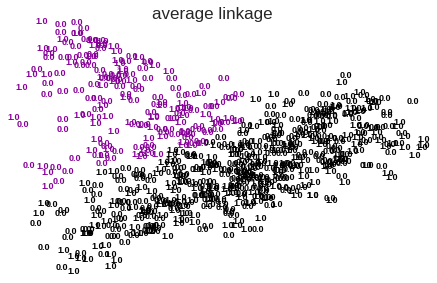

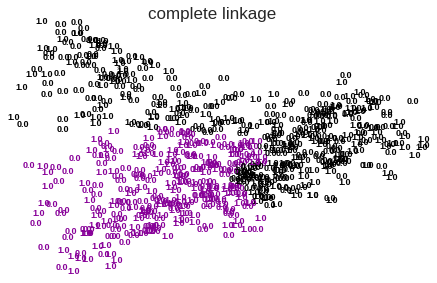

In [18]:
visualize_hierarchical_clusters(dataset, 2)

Computing embedding
Done.
average : 0.28s
complete : 0.28s


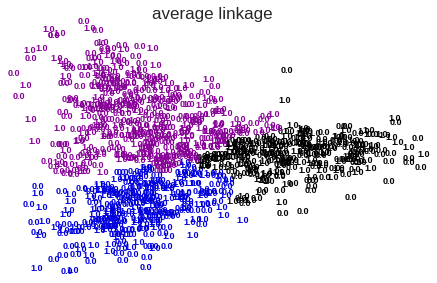

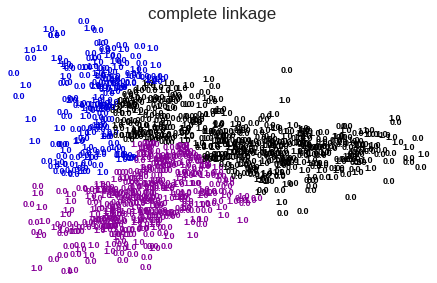

In [18]:
visualize_hierarchical_clusters(dataset, 3)

Computing embedding
Done.
average : 0.28s
complete : 0.29s


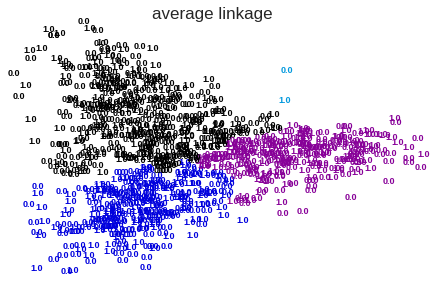

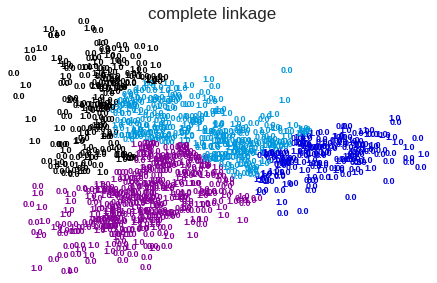

In [19]:
visualize_hierarchical_clusters(dataset, 4)

# Classification

In [30]:
do_classification(dataset)

,classifier,test acc,train acc
0,KNN,48.15,61.79
1,Linear Discriminant Analysis,51.08,58.68
2,Random Forest,48.62,100.00
3,Linear SVM,50.92,58.85
4,Logistic Regression,50.92,58.72
5,AdaBoost,52.62,75.52
6,Stochastic Gradient Descent Classifier,50.92,53.23
7,Quadratic Discriminant Analysis,52.62,62.43
8,Decision Tree,44.15,66.44
9,Naive Bayes,49.85,55.49
